# Stacking of LSTM and GRU for IMDB sentiment prediction

## Goal:
* Stacking layer to get good fit model.
* For detail overview of data, please go to the [the link](https://bit.ly/346w0IW)

## Data

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

# As imdb.load_data() gave an error, found in stackoverflow following suggestions
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# Load the most frequently appeared words in top 10000
print("INFO: Loading imdb dataset...")
(data_train, value_train), (data_test, value_test) = imdb.load_data(path="imdb.npz", num_words=10000)
print("INFO: # of training sequences %d" %len(data_train))
print("INFO: # of testing sequences %d" %len(data_test))

in_max_len = 400
data_train = sequence.pad_sequences(data_train, maxlen=in_max_len)
data_test = sequence.pad_sequences(data_test, maxlen=in_max_len)
print("INFO: train shape ", data_train.shape)
print("INFO: test shape ", data_test.shape)

Using TensorFlow backend.


INFO: Loading imdb dataset...
INFO: # of training sequences 25000
INFO: # of testing sequences 25000
INFO: train shape  (25000, 400)
INFO: test shape  (25000, 400)


## Matplotlib setup

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

font      = {'family':'arial', 'style':'normal', 'size':18}
axis_font = {'family':'arial', 'style':'normal', 'size':18}
plt.rc('font', **font)

## Models

In [3]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, LSTM, Dropout, Flatten, Dense, GRU, Bidirectional

## Stacking long short-term memory (LSTM) 

### 1. Tanh:tanh activation functions

In [4]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(LSTM(128, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
LSTM2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

W0823 12:08:03.384656 139843532212032 deprecation_wrapper.py:119] From /home/rojan/Kathmandu/Virtual/env/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 12:08:03.628071 139843532212032 deprecation_wrapper.py:119] From /home/rojan/Kathmandu/Virtual/env/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 12:08:03.631917 139843532212032 deprecation_wrapper.py:119] From /home/rojan/Kathmandu/Virtual/env/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 12:08:04.122758 139843532212032 deprecation_wrapper.py:119] From /home/rojan/Kathmandu/Virtual/env/lib64/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         197120    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,888,833
Trainable params: 2,888,833
Non-trainable params: 0
_________________________________________________________________


W0823 12:08:05.205013 139843532212032 deprecation_wrapper.py:119] From /home/rojan/Kathmandu/Virtual/env/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 209s 9ms/step - loss: 0.4836 - acc: 0.7759 - val_loss: 0.3612 - val_acc: 0.8588
Epoch 2/10
22500/22500 [==============================] - 208s 9ms/step - loss: 0.3275 - acc: 0.8695 - val_loss: 0.8436 - val_acc: 0.7468
Epoch 3/10
22500/22500 [==============================] - 212s 9ms/step - loss: 0.2554 - acc: 0.8996 - val_loss: 0.4153 - val_acc: 0.8256
Epoch 4/10
22500/22500 [==============================] - 212s 9ms/step - loss: 0.2289 - acc: 0.9152 - val_loss: 0.3311 - val_acc: 0.8580
Epoch 5/10
22500/22500 [==============================] - 215s 10ms/step - loss: 0.1874 - acc: 0.9313 - val_loss: 0.3271 - val_acc: 0.8800
Epoch 6/10
22500/22500 [==============================] - 212s 9ms/step - loss: 0.1556 - acc: 0.9438 - val_loss: 0.3454 - val_acc: 0.8756
Epoch 7/10
22500/22500 [==============================] - 212s 9ms/step - loss: 0.1332 - acc: 0.9528 - val_loss: 0.3609 - 

W0823 12:44:13.484342 139843532212032 font_manager.py:1282] findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
W0823 12:44:13.745966 139843532212032 font_manager.py:1282] findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
W0823 12:44:13.765975 139843532212032 font_manager.py:1282] findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


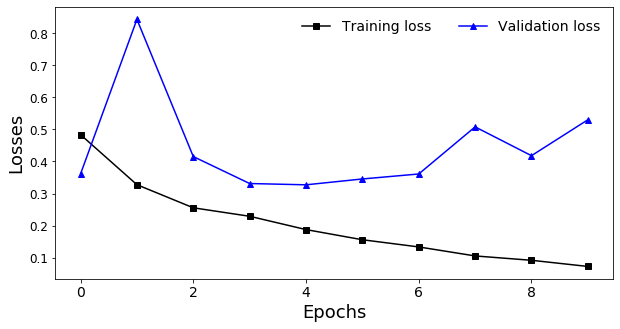

In [5]:
ts_tra_loss = LSTM2Log.history['loss']
ts_val_loss = LSTM2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

### 2. Sigmoid:sigmoid activation functions

In [6]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(LSTM(128, activation='sigmoid', return_sequences=True))
model.add(LSTM(128, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
LSTM2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 128)         197120    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,888,833
Trainable params: 2,888,833
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 211s 9ms/step - loss: 0.6332 - acc: 0.6128 - val_loss: 0.5017 - val_acc: 0.7532
Epoch 2/10
22500/22500 [==============================] - 209s 9ms/step - los

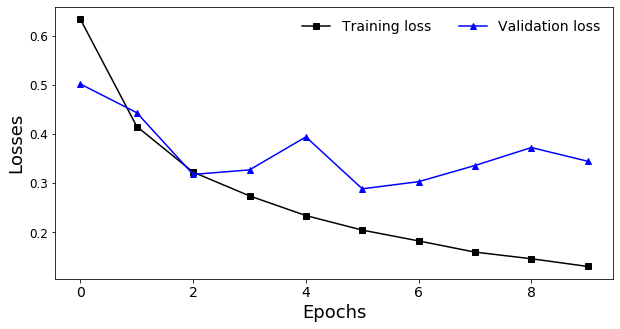

In [7]:
ts_tra_loss = LSTM2Log.history['loss']
ts_val_loss = LSTM2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)


### 3. Sigmoid:tanh activation functions

In [8]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(LSTM(128, activation='sigmoid', return_sequences=True))
model.add(LSTM(128, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
LSTM2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)
# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 128)         197120    
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,888,833
Trainable params: 2,888,833
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 206s 9ms/step - loss: 0.6126 - acc: 0.6457 - val_loss: 0.5045 - val_acc: 0.7544
Epoch 2/10
22500/22500 [==============================] - 201s 9ms/step - los

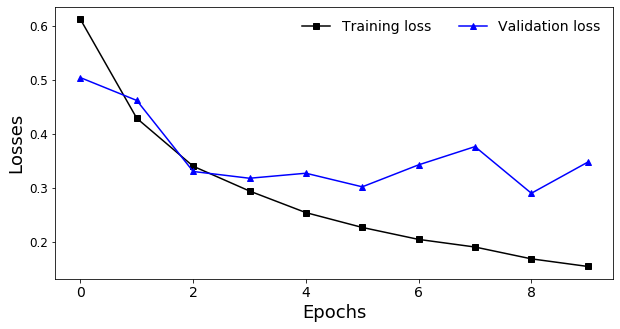

In [9]:
ts_tra_loss = LSTM2Log.history['loss']
ts_val_loss = LSTM2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

plt.show()

### 4. Tanh:sigmoid activation functions

In [10]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(LSTM(128, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
LSTM2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 128)         197120    
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,888,833
Trainable params: 2,888,833
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 200s 9ms/step - loss: 0.4830 - acc: 0.7666 - val_loss: 0.3919 - val_acc: 0.8356
Epoch 2/10
22500/22500 [==============================] - 198s 9ms/step - los

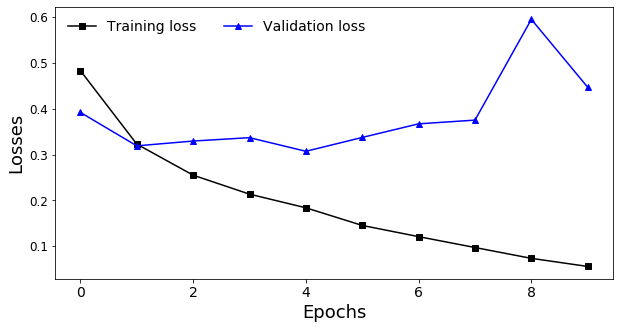

In [11]:
ts_tra_loss = LSTM2Log.history['loss']
ts_val_loss = LSTM2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

plt.show()

## Gated recurrent unit (GRU)

### 1. Sigmoid:sigmoid activation functions

In [12]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(GRU(128, activation='sigmoid', return_sequences=True))
model.add(GRU(128, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
GRU2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, None, 128)         147840    
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 2,806,657
Trainable params: 2,806,657
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 182s 8ms/step - loss: 0.6352 - acc: 0.6119 - val_loss: 0.5614 - val_acc: 0.6860
Epoch 2/10
22500/22500 [==============================] - 176s 8ms/step - los

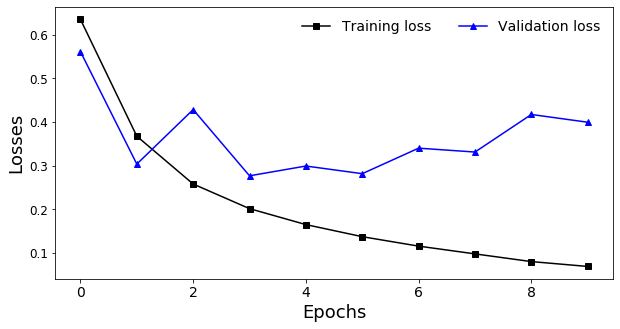

In [13]:
ts_tra_loss = GRU2Log.history['loss']
ts_val_loss = GRU2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

plt.show()

### 2. tanh:tanh activation functions

In [ ]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(GRU(128, activation='tanh', return_sequences=True))
model.add(GRU(128, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
GRU2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
gru_3 (GRU)                  (None, None, 128)         147840    
_________________________________________________________________
gru_4 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 2,806,657
Trainable params: 2,806,657
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 182s 8ms/step - loss: 0.5077 - acc: 0.7631 - val_loss: 0.3252 - val_acc: 0.8628
Epoch 2/10
22500/22500 [==============================] - 179s 8ms/step - los

In [ ]:
ts_tra_loss = GRU2Log.history['loss']
ts_val_loss = GRU2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

plt.show()

### 3. Tanh:sigmoid activation functions

In [ ]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(GRU(128, activation='tanh', return_sequences=True))
model.add(GRU(128, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
GRU2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

In [ ]:
ts_tra_loss = GRU2Log.history['loss']
ts_val_loss = GRU2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

plt.show()

### 4. Sigmoid:tanh activation functions

In [ ]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(GRU(128, activation='sigmoid', return_sequences=True))
model.add(GRU(128, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
GRU2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

In [ ]:
ts_tra_loss = GRU2Log.history['loss']
ts_val_loss = GRU2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

plt.show()

## Stacking recurrent neural network (RNN) 

### 1. Tanh:tanh activation functions

In [ ]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(SimpleRNN(128, activation='tanh', return_sequences=True))
model.add(SimpleRNN(128, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
RNN2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

In [ ]:
ts_tra_loss = RNN2Log.history['loss']
ts_val_loss = RNN2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

plt.show()

### 2. Sigmoid:sigmoid activation functions

In [ ]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(SimpleRNN(128, activation='sigmoid', return_sequences=True))
model.add(SimpleRNN(128, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
RNN2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

In [ ]:
ts_tra_loss = RNN2Log.history['loss']
ts_val_loss = RNN2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

plt.show()

### 3. Sigmoid:tanh activation functions

In [ ]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(SimpleRNN(128, activation='sigmoid', return_sequences=True))
model.add(SimpleRNN(128, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
RNN2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

In [ ]:
ts_tra_loss = RNN2Log.history['loss']
ts_val_loss = RNN2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

plt.show()

### 4. Tanh:sigmoid activation functions

In [ ]:
# Architecture
model = Sequential()
model.add(Embedding(10000, 256))
model.add(SimpleRNN(128, activation='tanh', return_sequences=True))
model.add(SimpleRNN(128, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Fitting data
RNN2Log = model.fit(data_train, value_train,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.1)

# Testing accuracy of parameters
fo_loss, fo_accuracy = model.evaluate(data_test, value_test, batch_size=128)
print("Loss: ", fo_loss)
print("Accuracy: ", fo_accuracy)

In [ ]:
ts_tra_loss = RNN2Log.history['loss']
ts_val_loss = RNN2Log.history['val_loss']

ts_in_epochs = np.arange(0, len(ts_tra_loss))
fig = plt.figure(figsize=(10, 5))

plt.plot(ts_in_epochs, ts_tra_loss, 's-', color="k", label='Training loss')
plt.plot(ts_in_epochs, ts_val_loss, '^-', color="b", label='Validation loss')

ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

plt.show()